---
---

<h1><center><ins>Numerical Methods: Exam 1</ins></center></h1>
<h2><center>November 12, 09:45-11:15 </center></h2>

Please compute the below questions in the python notebook, *documenting your code* where needed. 

Remember also to **_answer any discussion points asked in the question_**.  

***Before 11:20*** your notebook needs to be uploaded to Moodle, and/or emailed to (both) Kristina and Alina <br> (kristina.kislyakova@univie.ac.at, alina.boecker@univie.ac.at)<br>
<br>
This means you have roughly 60 minutes to complete the exercises in this part.

You may use the lecture notes and any of your exercise notebooks freely, but you can **not** use ChatGPT code assistant or other AI coding tools.<br> 
**_Collaboration or plagarized code in any way is prohibited and no phones or communication will be allowed_**.

---
---

In [7]:
from scipy.integrate import quad
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import inv, lu_solve, lu_factor
from scipy.interpolate import CubicSpline

## Exercise 1 (9 Points)

Consider the system:

$$
\begin{cases}
2x_1 + 2x_2 + 2x_3 = 6 \\
2.001x_1  + 2x_2 + 2x_3 = 6.001 \\
2x_1  + 2.001x_2 + 2x_3 = 6.001
\end{cases}
$$

**(a)** Write the system in matrix form $A\mathbf{x} = \mathbf{b}$. Solve for $\mathbf{x}$ by calculating the inverse of $A$ (Hint: under https://numpy.org/doc/stable/reference/routines.linalg.html#solving-equations-and-inverting-matrices you should find the build-in function you are looking for). (1 Point)

**(b)** Perform LU decomposition to find the solution vector $\mathbf{x}$. Calculate the difference between the exact solution $\mathbf{b}$ and your numerical one. Is it the same for the two methods? What does this imply for possibly even larger and thus more complex matrices? (1.5 Points)

Now consider the function

$$y = f(x) = \frac{1}{1+x^2}$$

**(c)** Plot the function on a domain of [-10,10] in x. Calculate the numerical derivative of the function using the forward finite difference and plot the result next to it (Hint: use a subplot). Choose the step-size $h$ such that the truncation error is 1e-2 at $x=1$. (Hint: the truncation error is $\epsilon\sim\frac{|f^{\prime\prime}(x)|}{2}h$). (3 Points)

**(d)** Now calculate the second derivative of y numerically. Use the same step-size as before as well as one that is 10 times larger. Using the samples of x with step-size of $10h$, interpolate y using a cubic spline (from scipy.interpolate.CubicSpline: https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.CubicSpline.html#scipy.interpolate.CubicSpline). Use the CubicSpline to find the second derivative using step-size $10h$ (Hint: look at the first example under the link). Compare all three numerical derivatives in a figure. What is your conclusion? (3.5 Points)

**(e) Extra Point**  Now add a random error of 1\% to your values of y evaluated with step-size $h$ (Hint: use np.random.normal(y,0.01)). Calculate again the first numerical derivative. Which percentage level is the difference between the new derivative values and the ones from **(c)**? Comment on what is happening. (1 Point)

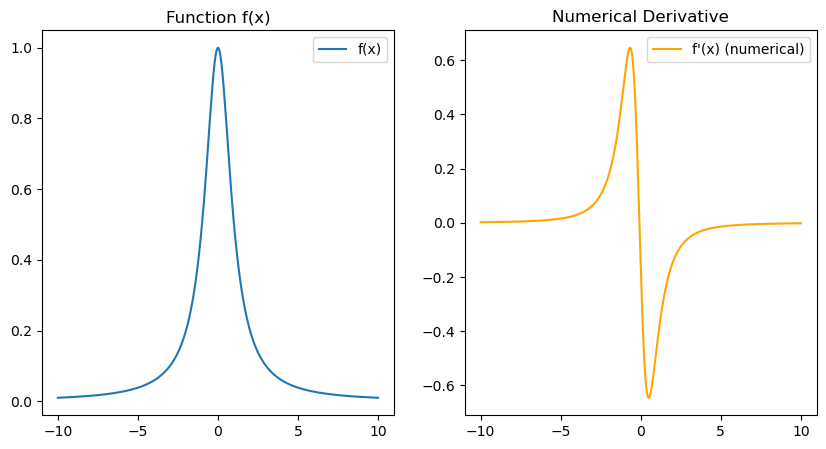

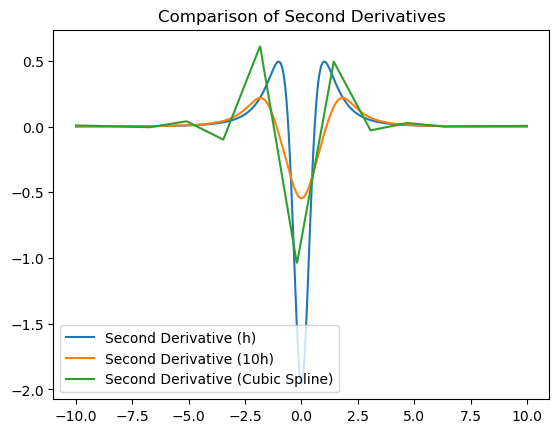

In [8]:
#(a)
#define our system
A = np.array([[2, 2, 2],
              [2.001, 2, 2],
              [2, 2.001, 2]])
b = np.array([6, 6.001, 6.001])

#matrix inverse to solve a
x_inv = np.linalg.inv(A) @ b

#(b)
#solve using LU decomposition
lu, piv = lu_factor(A)
x_lu = lu_solve((lu, piv), b)

#difference between solutions
diff = np.linalg.norm(x_inv - x_lu)

#(c)
#f(x) and the numerical derivative
def f(x):
    return 1 / (1 + x**2)

x = np.linspace(-10, 10, 1000) #linspace to evenly space out points
y = f(x)

#calculate step size (h) for the truncation
x1 = 1
f_double_prime = lambda x: (6 * x) / (1 + x**2)**3
h = np.sqrt(2 * 1e-2 / abs(f_double_prime(x1)))

#finite difference
dy_dx = (f(x + h) - f(x)) / h

#plot 
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(x, y, label="f(x)")
plt.title("Function f(x)")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, dy_dx, label="f'(x) (numerical)", color="orange")
plt.title("Numerical Derivative")
plt.legend()
plt.show()

#(d)
#second derivative
d2y_dx2_h = (f(x + h) - 2 * f(x) + f(x - h)) / h**2
d2y_dx2_10h = (f(x + 10*h) - 2 * f(x) + f(x - 10*h)) / (10*h)**2

#spline interpolation
x_sample = np.arange(-10, 10, 10*h)
y_sample = f(x_sample)
cubicspline = CubicSpline(x_sample, y_sample)
d2y_dx2_spline = cubicspline(x, 2)

#plot
plt.figure()
plt.plot(x, d2y_dx2_h, label="Second Derivative (h)")
plt.plot(x, d2y_dx2_10h, label="Second Derivative (10h)")
plt.plot(x, d2y_dx2_spline, label="Second Derivative (Cubic Spline)")
plt.title("Comparison of Second Derivatives")
plt.legend()
plt.show()


## Exercise 2 (9 Points)

Consider the following two curves:
$$ f(x) = 6 - (x+2)^2 $$
$$ g(x) = \frac{1}{2}x $$

**(a)** Use _**your own version**_ of the **Newton Raphson method** to find the two intersections of these two curves (Hint: You can reformulate the problem as finding the roots of a single function built from the two given ones.). Plot the two curves in a figure to understand sensible guesses for the two starting points. Also plot the two two intersection points you found with the Newton Raphson method. (Hint: Use xlims=[-10,10] and ylims=[-10,10] for the plot). (2 Points)

**(b)** Use _**your own version**_ of the **Trapezoid method** to find the area between the two curves (Hint: use the points calculated from **(a)** as the upper and lower limits for the integration). Sample the integrand at 100 equally spaced abscissae. Compare this result with the **_build-in version_** of **scipy.integrate.quad**, which uses adaptive Gaussian quadrature. (3 Points)

**(c)** How many samples of abscissae do you need for your Trapezoid method in order to reach the same result provided by scipy.integrate.quad with a precision of 1e-4? Per iteration multiply the number of abscissae by 10. How does this compare to the error returned by the scipy.integrate.quad routine? Comment on this. (3 Points)

**(d)** In your figure from **(a)** shade the area you calculated between the two curves. Hint: Use fill_between from matplotlib. (1 Point)

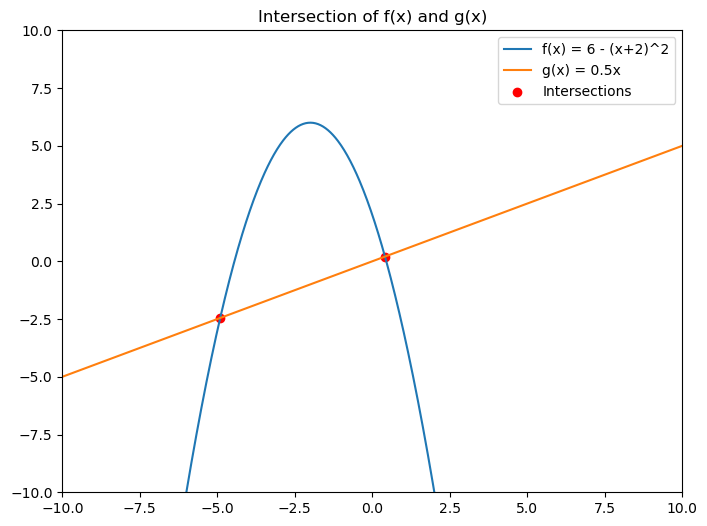

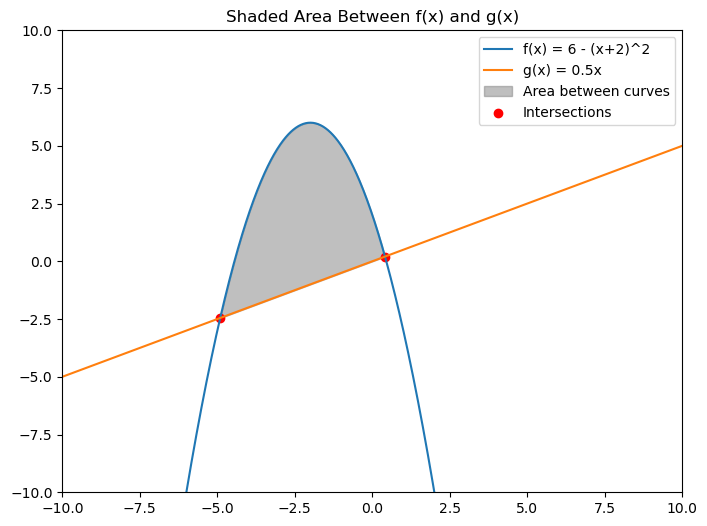

In [9]:
#define functions
def f(x):
    return 6 - (x + 2)**2

def g(x):
    return 0.5 * x

#define h(x) the derivative
def h(x):
    return f(x) - g(x)

def h_prime(x):
    return -2 * (x + 2) - 0.5

#(a)
#Newton-Raphson method to find intersections
def newton_raphson(x0, tol=1e-6, max_iter=100):
    x = x0
    for _ in range(max_iter):
        x_new = x - h(x) / h_prime(x)
        if abs(x_new - x) < tol:
            return x_new
        x = x_new
    raise ValueError("Newton-Raphson did not converge")

#initial guesses for the roots
x1 = newton_raphson(-5) #tested with various numbers but nothing changes??
x2 = newton_raphson(2)

#plot
x_vals = np.linspace(-10, 10, 1000)
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f(x_vals), label="f(x) = 6 - (x+2)^2")
plt.plot(x_vals, g(x_vals), label="g(x) = 0.5x")
plt.scatter([x1, x2], [f(x1), f(x2)], color="red", label="Intersections")
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.legend()
plt.title("Intersection of f(x) and g(x)")
plt.show()

#(d)
#plot the shading
plt.figure(figsize=(8, 6))
plt.plot(x_vals, f(x_vals), label="f(x) = 6 - (x+2)^2")
plt.plot(x_vals, g(x_vals), label="g(x) = 0.5x")
plt.fill_between(x_vals, f(x_vals), g(x_vals), where=(x_vals >= x1) & (x_vals <= x2), 
                 color="gray", alpha=0.5, label="Area between curves")
plt.scatter([x1, x2], [f(x1), f(x2)], color="red", label="Intersections")
plt.xlim([-10, 10])
plt.ylim([-10, 10])
plt.legend()
plt.title("Shaded Area Between f(x) and g(x)")
plt.show()